Creating and visualazing datasets for linear regression

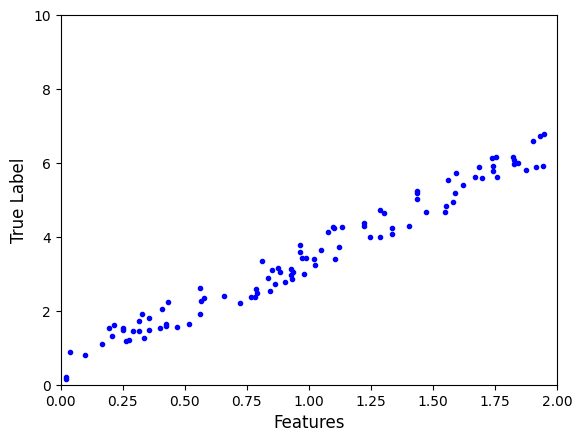

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) #X are 100 1-d feature vector
y = 3 * X + np.random.rand(100, 1) #y are true label values of X

plt.plot(X, y, 'b.')
plt.xlabel("Features", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.axis([0,2, 0, 10])
plt.show()

Computing Gradient Descent with multiple learning rates.

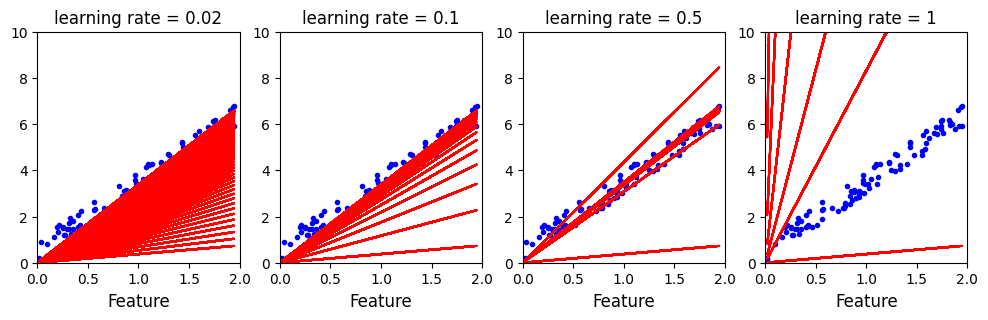

In [12]:
epochs = 1000 #Number of epochs for updating weights

def compute_gradient_descent(w, eta):
    plt.plot(X, y, "b.")
    d_train = X.size

    for i in range(epochs):
        y_predict = X.dot(w)
        plt.plot(X, y_predict, "r-")
        gradient = 2/d_train * (w.dot(X.T) - y.T).dot(X)
        w = w - eta * gradient
    
    plt.xlabel("Feature", fontsize=12)
    plt.title("learning rate = {}".format(eta), fontsize=12)
    plt.axis([0, 2, 0, 10])
np.random.seed(42)
w = np.random.rand(1)

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
compute_gradient_descent(w, 0.02)
plt.subplot(1, 4, 2)
compute_gradient_descent(w, 0.1)
plt.subplot(1, 4, 3)
compute_gradient_descent(w, 0.5)
plt.subplot(1, 4, 4)
compute_gradient_descent(w, 1)

plt.show()
